In [1]:
#importing important liabries 
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA


import warnings

# To ignore all warnings (not recommended unless you are sure)
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('Fatala-Police-Killing-in-the-USA_main_fatal_police_killings_in_the_USA_DownloadedData_fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
df=data.copy()

In [4]:
#Explore dataset statistics
data.describe()

,id,age,longitude,latitude
count,7662.000000,7198.000000,6832.000000,6832.000000
mean,4232.256983,37.154210,-97.056950,36.669658
std,2392.923808,12.944269,16.597978,5.394650
min,3.000000,2.000000,-160.007000,19.498000
25%,2148.250000,27.000000,-112.042250,33.480000
50%,4256.500000,35.000000,-94.242000,36.095500
75%,6306.750000,45.000000,-83.083250,40.025250
max,8336.000000,92.000000,-67.867000,71.301000


In [5]:
#Check for missing values
data.isnull().sum()

id                            0
name                        399
date                          0
manner_of_death               0
armed                       209
age                         464
gender                       18
race                       1424
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        853
body_camera                   0
longitude                   830
latitude                    830
is_geocoding_exact            0
dtype: int64

In [6]:
# Calculate percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a summary dataframe with columns and their corresponding missing percentage
missing_data_summary = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

# Set the threshold for missing values percentage (e.g., 10%)
threshold = 10

# List columns where missing percentage is above the threshold
columns_above_threshold = missing_data_summary[missing_data_summary['Missing Percentage'] > threshold]['Column']

# Output the summary
missing_data_summary

,Column,Missing Percentage
0,id,0.000000
1,name,5.207518
2,date,0.000000
3,manner_of_death,0.000000
4,armed,2.727747
5,age,6.055860
6,gender,0.234926
7,race,18.585226
8,city,0.000000
9,state,0.000000


In [7]:
def miss(data):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    return missing_percentage

In [8]:
# Handle missing values (if any)
# For simplicity, removing rows with missing values  
data = data.dropna()

In [9]:
#now all the null values are removed 
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [10]:
#Check the data types of each column in the DataFrame
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [11]:
# Removes duplicate rows
data.drop_duplicates(inplace=True) 
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [12]:
# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

# Encode 'manner_of_death', 'armed', 'gender', 'race', 'city', and 'state'
categorical_columns = ['manner_of_death', 'armed', 'gender', 'race', 'city', 'state']
for column in categorical_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

In [13]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,manner_of_death_encoded,armed_encoded,gender_encoded,race_encoded,city_encoded,state_encoded
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,False,-123.122,47.247,True,0,34,1,0,1908,47
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,False,-122.892,45.487,True,0,34,1,5,32,37
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,False,-97.281,37.695,True,1,84,1,2,2258,16
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,False,-122.422,37.763,True,0,83,1,5,1843,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,False,-104.692,40.384,True,0,60,1,2,647,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,8072,Masen T. Moore,2022-05-29,shot,gun,22.0,M,W,Sedalia,MO,...,False,-93.238,38.705,True,0,34,1,5,1887,24
7442,8089,Victor Torres,2022-05-31,shot,gun,42.0,M,W,Spring Hill,FL,...,True,-82.602,28.442,True,0,34,1,5,1971,9
7443,8178,Michael Angelo Gales,2022-05-31,shot,gun,37.0,M,B,Locust,NC,...,False,-80.431,35.295,True,0,34,1,1,1177,27
7458,8113,Edward C. Samaan,2022-06-03,shot,hatchet,28.0,M,W,Naperville,IL,...,True,-88.202,41.796,True,0,43,1,5,1420,14


In [14]:
# Select relevant features for clustering
features = data[['age', 'longitude', 'latitude', 'manner_of_death_encoded','gender_encoded', 'state_encoded']]

# Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

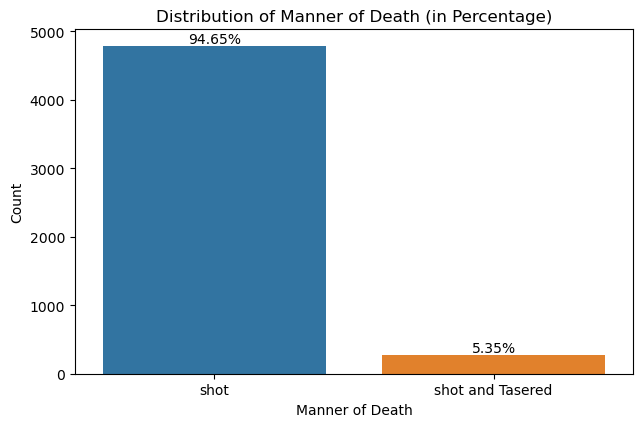

In [15]:
# Calculate the percentages for each category in 'manner_of_death'
manner_of_death_counts = data['manner_of_death'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)

# Create the count plot
sns.countplot(x='manner_of_death', data=data)

# Annotate the bars with percentages
total = len(data['manner_of_death'])
for index, value in enumerate(manner_of_death_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Distribution of Manner of Death (in Percentage)')
plt.tight_layout()
plt.show()


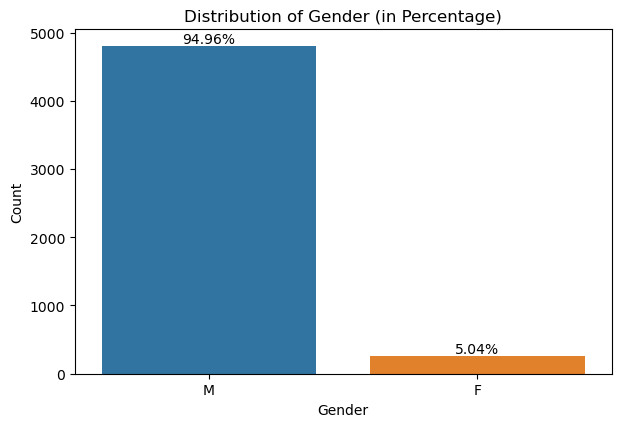

In [16]:

# Calculate the percentages for each category in 'gender'
gender_counts = data['gender'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 2)

# Create the count plot
sns.countplot(x='gender', data=data)

# Annotate the bars with percentages
total = len(data['gender'])
for index, value in enumerate(gender_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender (in Percentage)')
plt.tight_layout()
plt.show()


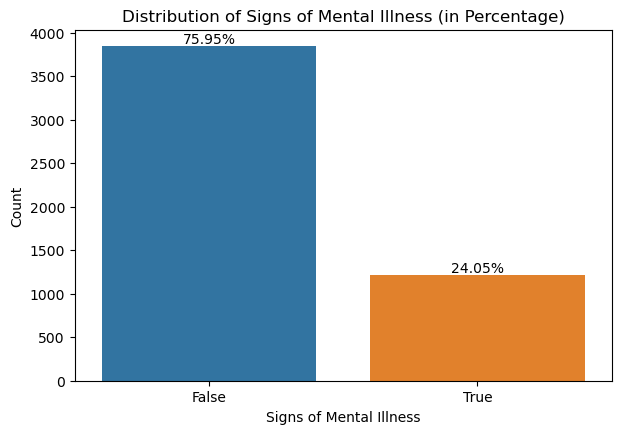

In [17]:

# Calculate the percentages for each category in 'signs_of_mental_illness'
mental_illness_counts = data['signs_of_mental_illness'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(18, 12))
plt.xticks(rotation=45)
plt.subplot(3, 3, 5)

# Create the count plot
sns.countplot(x='signs_of_mental_illness', data=data)

# Annotate the bars with percentages
total = len(data['signs_of_mental_illness'])
for index, value in enumerate(mental_illness_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Distribution of Signs of Mental Illness (in Percentage)')
plt.tight_layout()
plt.show()


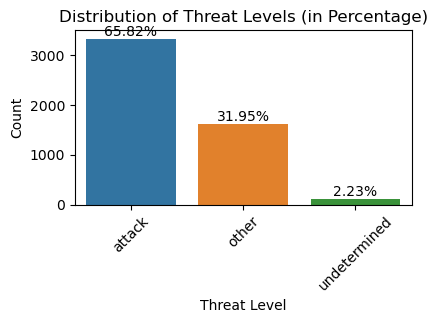

In [18]:

# Calculate the percentages for each category in 'threat_level'
threat_level_counts = data['threat_level'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 6)

# Create the count plot
sns.countplot(x='threat_level', data=data)

# Annotate the bars with percentages
total = len(data['threat_level'])
for index, value in enumerate(threat_level_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.title('Distribution of Threat Levels (in Percentage)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



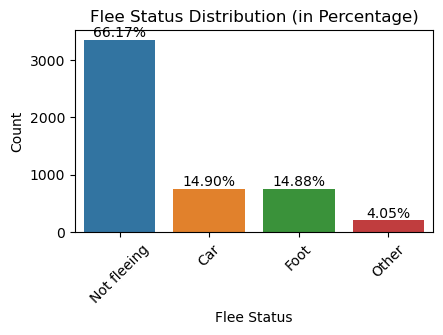

In [19]:

# Calculate the percentages for each category in 'flee'
flee_counts = data['flee'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 7)

# Create the count plot
sns.countplot(x='flee', data=data)

# Annotate the bars with percentages
total = len(data['flee'])
for index, value in enumerate(flee_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Flee Status')
plt.ylabel('Count')
plt.title('Flee Status Distribution (in Percentage)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


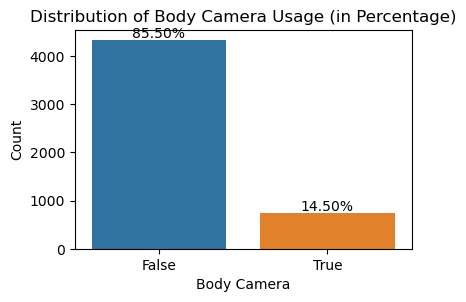

In [20]:

# Calculate the percentages for each category in 'body_camera'
body_camera_counts = data['body_camera'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 8)

# Create the count plot
sns.countplot(x='body_camera', data=data)

# Annotate the bars with percentages
total = len(data['body_camera'])
for index, value in enumerate(body_camera_counts):
    count = int((value / 100) * total)  # Calculate count from percentage
    plt.text(index, count, f'{value:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Body Camera')
plt.ylabel('Count')
plt.title('Distribution of Body Camera Usage (in Percentage)')
plt.tight_layout()
plt.show()


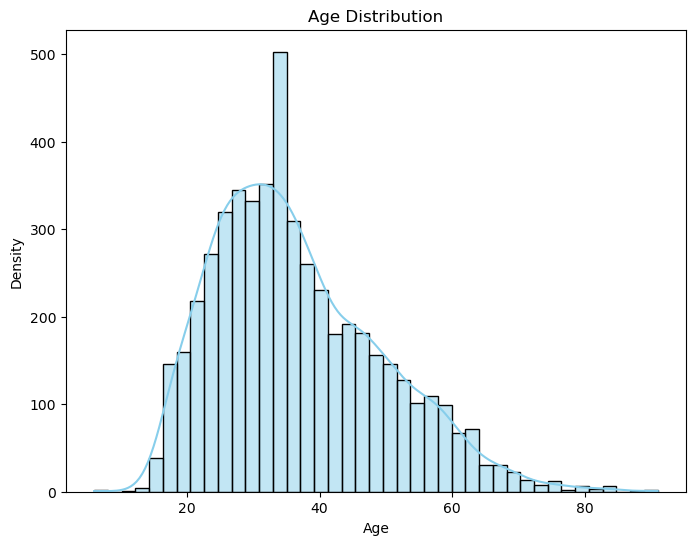

In [21]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

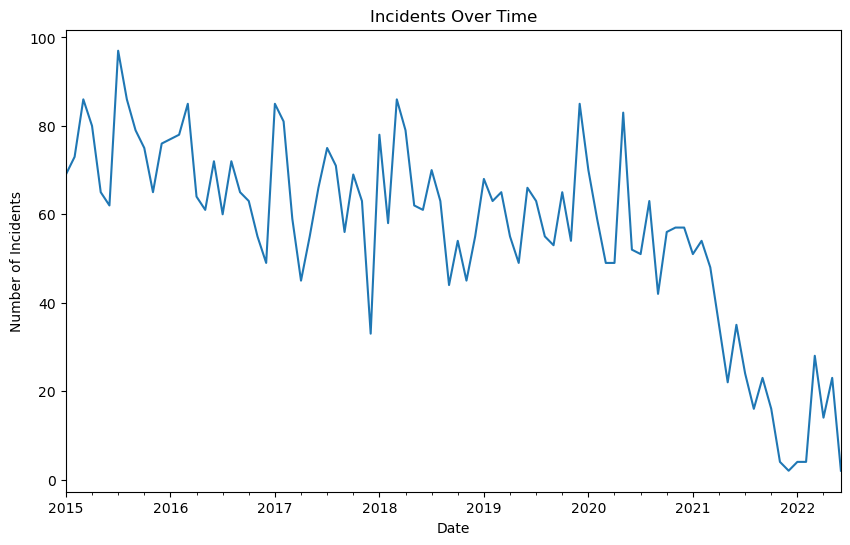

In [22]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Incidents over time
plt.figure(figsize=(10, 6))
data.set_index('date').resample('M').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incidents Over Time')
plt.show()

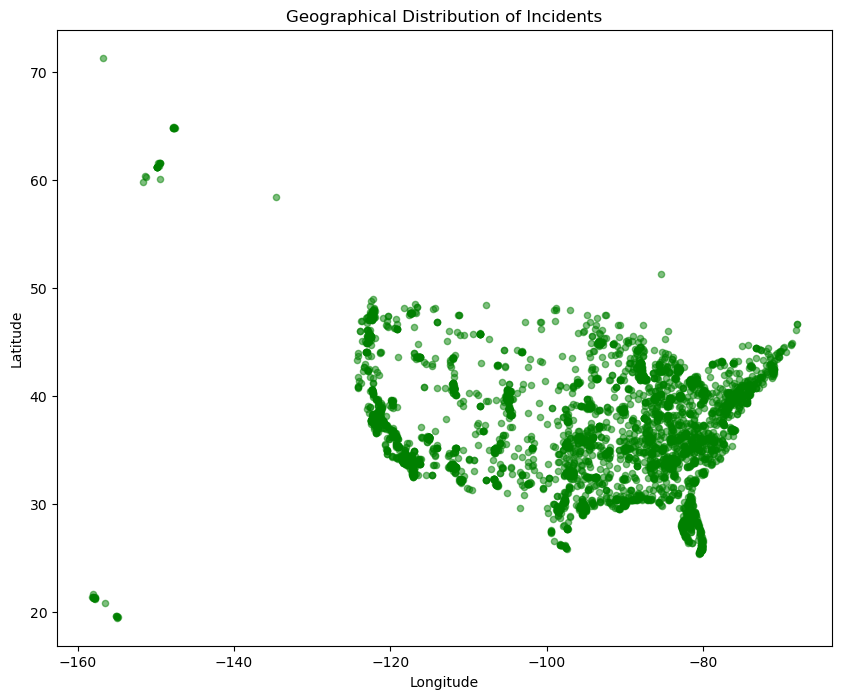

In [23]:
# Geographical distribution of incidents
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], s=20, color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Incidents')
plt.show()

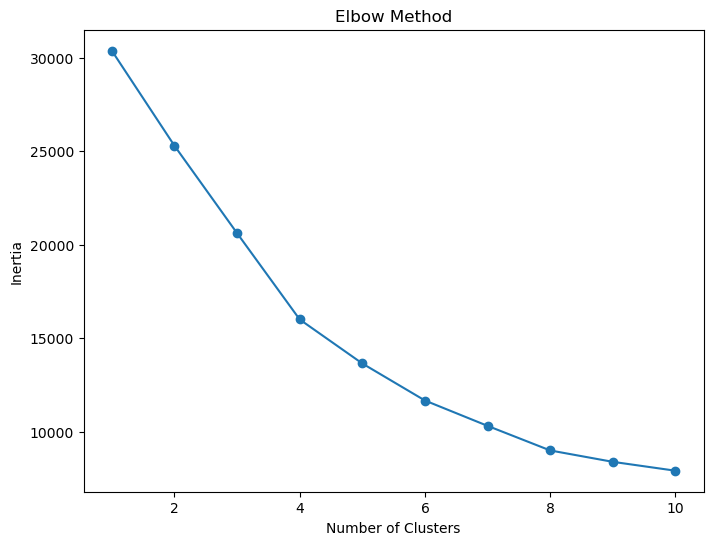

In [24]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Based on the Elbow Method, choose the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


# Add the cluster labels to the original dataset
data['cluster'] = clusters

In [25]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,longitude,latitude,is_geocoding_exact,manner_of_death_encoded,armed_encoded,gender_encoded,race_encoded,city_encoded,state_encoded,cluster
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,-123.122,47.247,True,0,34,1,0,1908,47,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,-122.892,45.487,True,0,34,1,5,32,37,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,-97.281,37.695,True,1,84,1,2,2258,16,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,-122.422,37.763,True,0,83,1,5,1843,4,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,-104.692,40.384,True,0,60,1,2,647,5,1


In [26]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(features, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1875935215445353


In [27]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [28]:
data['state_encoded'].unique()

array([47, 37, 16,  4,  5, 36,  3, 12, 38, 43, 35, 18, 44,  2, 14, 33, 32,
       45, 31, 15, 23, 17, 19, 24, 30, 13, 20, 29, 22, 26, 10,  9, 42, 27,
        0, 34, 21,  1, 25, 48, 40,  7, 49,  8, 11, 50, 28,  6, 41, 46, 39])

In [29]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [31]:
import plotly.express as px
import pandas as pd

# Assuming 'features' and 'clusters' are defined with the correct column names
# Assuming 'num_clusters' is set to 4

# Add the cluster labels to the features DataFrame
features['cluster'] = clusters

# Create an interactive 3D scatter plot using Plotly with larger points
fig = px.scatter_3d(features, x='age', y='manner_of_death_encoded', z='gender_encoded', 
                    color='cluster', symbol='cluster', opacity=0.7, size_max=15,  
                    title='K-Means Clustering in 3D with Four Clusters',
                    labels={'manner_of_death': 'Manner of Death', 
                            'armed_status': 'Armed Status', 
                            'gender': 'Gender'})

# Show the plot
fig.show()
